## A2

In [1]:
from skimage.color import rgb2gray
from skimage import io, color
import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from scipy.signal import correlate2d, convolve2d
import numpy as np

(307, 375)


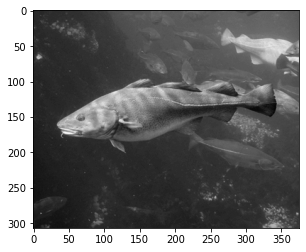

In [2]:
testimg = io.imread('../data/fish.bmp')
testimg = rgb2gray(testimg)

plt.imshow(testimg, cmap=plt.cm.gray)
# plt.show()
testimg2 = testimg - np.mean(testimg)
print(testimg2.shape)
plt.imsave('fish.png', testimg2, cmap=plt.cm.gray)

(50, 50)


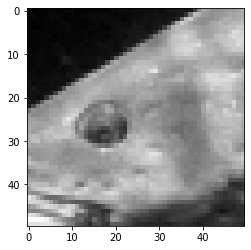

In [3]:
f = testimg[125:175, 50:100]
plt.imshow(f, cmap=plt.cm.gray)
f2 = f - np.mean(f)
print(f2.shape)
plt.imsave('filter_fish.png', f2, cmap=plt.cm.gray)

(307, 375)


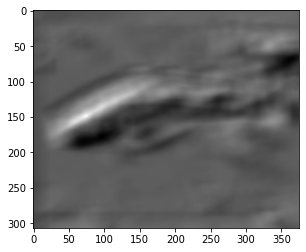

In [4]:
I = correlate2d(testimg2, f2, 'same')
print(I.shape)
plt.imshow(I, cmap=plt.cm.gray)
plt.imsave('correlate2d_fish.png', I, cmap=plt.cm.gray)

(307, 375)


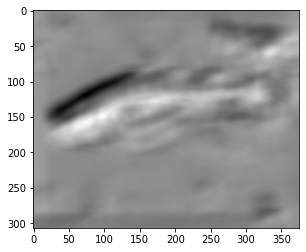

In [5]:
I2 = convolve2d(testimg2, f2, 'same')
print(I2.shape)
plt.imshow(I2, cmap=plt.cm.gray)
plt.imsave('convolve2d_fish.png', I2, cmap=plt.cm.gray)

### A4

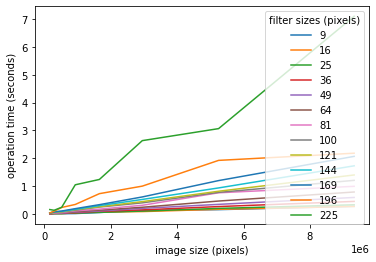

In [7]:
import time
import matplotlib.pyplot as plt
from skimage import io, img_as_float32

from skimage.transform import rescale, resize
from scipy.ndimage import correlate, convolve
import numpy as np

image = img_as_float32(io.imread('./RISDance.jpg'))
# print(image.shape)
original_image = resize(image, (2160, 3840), anti_aliasing=True)
# original_image = rescale(image, 1.5)
# print(original_image.shape)

for kernel_size in range(3, 16):
    shrinking_image = original_image
    image_sizes = []
    times = []
    
    while(shrinking_image.size > 250000):
#         print(kernel_size)
        kernel = np.random.rand(kernel_size, kernel_size, 1)
#         print(kernel)
        shrinking_image = rescale(shrinking_image, 0.75)
        start = time.time()
        convolve(shrinking_image, kernel)
        end = time.time()
        image_sizes.append(shrinking_image.size)
        times.append(end-start)
    plt.plot(image_sizes, times, label=str(kernel.size))

plt.xlabel('image size (pixels)')
plt.ylabel('operation time (seconds)')
plt.legend(title='filter sizes (pixels)')
plt.savefig('A4.png')
plt.show()

## A5

In [21]:
import numpy as np

# create an array of shape (320, 640) filled with zeros
a = np.zeros((320, 640))
# print(a)

# create a new 2D array variable of shape (320, 640) for img. remove all the 1-sized dimensions
img = np.random.rand(1, 1, 320, 640)
b = np.squeeze(img, axis=(0,1))
# print(b.shape)

# add a dimension
c = np.expand_dims(b, axis=0)
# print(c.shape)

# clip the image array that its values lie within the range [-0.5, 0.5]
d = np.clip(c, -0.5, 0.5)
# print(d)

# with rgb, reetrieve blue channel while preserving all of values
img = np.random.rand(320, 640, 3)
print(img.shape)
e = img[:, :, 2]
# print(e)
f = np.stack((img[:, :, 0], img[:,:,2]), axis=2)
# print(f)

g = np.pad(img, ((2, 2), (3, 3), (0, 0)), 'constant')
print(g.shape)

(320, 640, 3)
(324, 646, 3)
